In [1]:
import pandas as pd
from datetime import timedelta
from binance.client import Client

api = 'Z0ITlKtBapUWeVbZpUCr80YemOkH7AMHKEwHFLdQy5JA8WZG9Ndlw6HudPwJPIvh'
secret = '0wQwHxsIVy0JToIXsBhmYfNDP7saGoaqADdGodwwZguPYLCAhfDHQDneZcYYwGdH'
client = Client(api, secret)

In [2]:
def spots_historical_data(symbol, interval, start_time, end_time):
    try:
        df = pd.DataFrame(client.futures_historical_klines(symbol, interval, start_time, end_time))
        if df.empty:
            print(f"No data returned for {symbol}")
            return pd.DataFrame()
        df = df.iloc[:, 0:6]
        df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
        df['date'] = pd.to_datetime(df['date'], unit='ms') + timedelta(hours=7)
        df['ticker'] = symbol
        return df[:-1]
    except Exception as e:
        print(f"Error fetching spot data for {symbol}: {e}")
        return pd.DataFrame()

In [3]:
df = spots_historical_data('XRPUSDT', Client.KLINE_INTERVAL_4HOUR, '2008-01-01', '2024-08-12')
df

,date,open,high,low,close,volume,ticker
0,2020-01-06 15:00:00,0.1970,0.2222,0.1970,0.2130,13996360.0,XRPUSDT
1,2020-01-06 19:00:00,0.2130,0.2180,0.2108,0.2124,17962735.0,XRPUSDT
2,2020-01-06 23:00:00,0.2124,0.2209,0.2115,0.2194,27389315.0,XRPUSDT
3,2020-01-07 03:00:00,0.2195,0.2259,0.2169,0.2226,32673808.9,XRPUSDT
4,2020-01-07 07:00:00,0.2227,0.2297,0.2183,0.2196,18665127.0,XRPUSDT
...,...,...,...,...,...,...,...
10073,2024-08-11 11:00:00,0.5887,0.5930,0.5857,0.5911,75607112.6,XRPUSDT
10074,2024-08-11 15:00:00,0.5911,0.5925,0.5732,0.5756,240120607.8,XRPUSDT
10075,2024-08-11 19:00:00,0.5755,0.5762,0.5625,0.5663,232143297.2,XRPUSDT
10076,2024-08-11 23:00:00,0.5663,0.5709,0.5585,0.5592,140038983.0,XRPUSDT


In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'open', 'high', 'low', 'close', 'volume']]
df.set_index('date', inplace=True)
df.to_csv('xrp_futures_4hour.csv')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.optimizers import SGD

In [9]:
df = pd.read_csv('xrp_spots_1hour.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,open,high,low,close,volume
date,,,,,
2018-05-04 15:00:00,0.50000,1.50000,0.5000,0.92300,5090857.33
2018-05-04 16:00:00,0.92300,0.92850,0.9010,0.90199,3326696.10
2018-05-04 17:00:00,0.90199,0.91027,0.8951,0.90128,1176810.48
2018-05-04 18:00:00,0.90128,0.92130,0.8800,0.91596,1714233.92
2018-05-04 19:00:00,0.91596,0.92450,0.9000,0.90098,1323800.17
...,...,...,...,...,...
2024-08-12 02:00:00,0.56900,0.56900,0.5589,0.55930,19062997.00
2024-08-12 03:00:00,0.55930,0.55960,0.5492,0.55200,35705424.00
2024-08-12 04:00:00,0.55200,0.55650,0.5490,0.55510,15354450.00


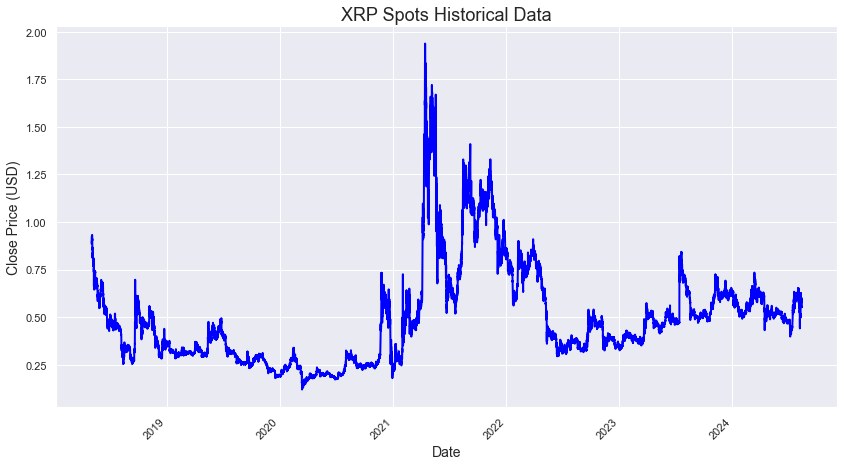

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df['close'], color='blue', linewidth=2)

plt.title("XRP Spots Historical Data", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(True)

plt.show()

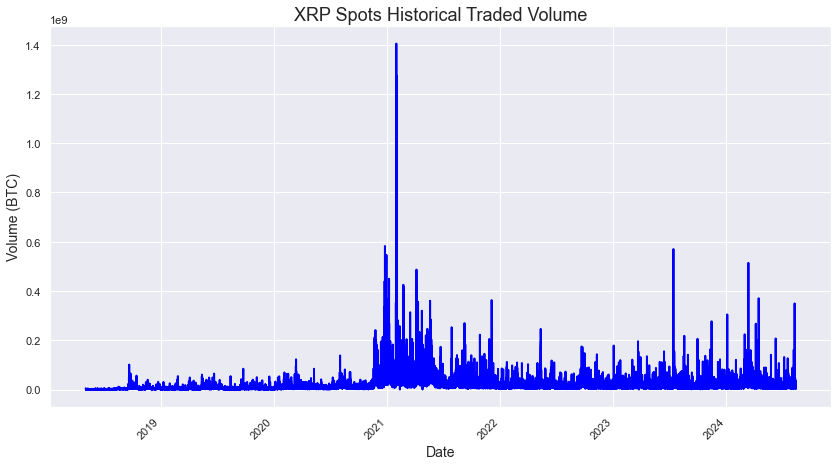

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(df['volume'], color='blue', linewidth=2)

plt.title("XRP Spots Historical Traded Volume", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume (BTC)", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(True)

plt.show()

In [13]:
df['short_mavg'] = df['close'].rolling(window=10, min_periods=1, center=False).mean()
df['long_mavg'] = df['close'].rolling(window=60, min_periods=1, center=False).mean()
df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1.0, 0.0)

In [35]:
df['signal'].value_counts()

signal
0.0    28798
1.0    26114
Name: count, dtype: int64

In [14]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
df['EMA10'] = EMA(df, 10)
df['EMA30'] = EMA(df, 30)
df['EMA200'] = EMA(df, 200)

#calculation of rate of change
def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))
    return ROC
df['ROC10'] = ROC(df['close'], 10)
df['ROC30'] = ROC(df['close'], 30)

#Calculation of price momentum
def MOM(df, n):
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))
    return MOM
df['MOM10'] = MOM(df['close'], 10)
df['MOM30'] = MOM(df['close'], 30)

#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)
df['RSI10'] = RSI(df['close'], 10)
df['RSI30'] = RSI(df['close'], 30)
df['RSI200'] = RSI(df['close'], 200)

#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA

In [15]:
df['%K10'] = STOK(df['close'], df['low'], df['high'], 10)
df['%D10'] = STOD(df['close'], df['low'], df['high'], 10)
df['%K30'] = STOK(df['close'], df['low'], df['high'], 30)
df['%D30'] = STOD(df['close'], df['low'], df['high'], 30)
df['%K200'] = STOK(df['close'], df['low'], df['high'], 200)
df['%D200'] = STOD(df['close'], df['low'], df['high'], 200)
df['MA21'] = MA(df, 10)
df['MA63'] = MA(df, 30)
df['MA252'] = MA(df, 200)

In [16]:
df = df.fillna(0)
df.head()

,open,high,low,close,volume,short_mavg,long_mavg,signal,EMA10,EMA30,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
date,,,,,,,,,,,,,,,,,,,,,
2018-05-04 15:00:00,0.50000,1.50000,0.5000,0.92300,5090857.33,0.923000,0.923000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-04 16:00:00,0.92300,0.92850,0.9010,0.90199,3326696.10,0.912495,0.912495,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-04 17:00:00,0.90199,0.91027,0.8951,0.90128,1176810.48,0.908757,0.908757,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-04 18:00:00,0.90128,0.92130,0.8800,0.91596,1714233.92,0.910558,0.910558,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-04 19:00:00,0.91596,0.92450,0.9000,0.90098,1323800.17,0.908642,0.908642,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


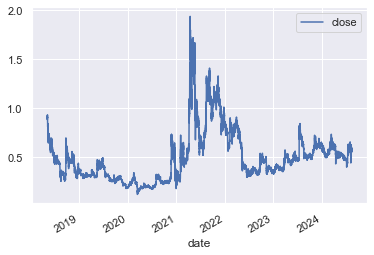

In [17]:
df[['close']].plot(grid=True)
plt.show()

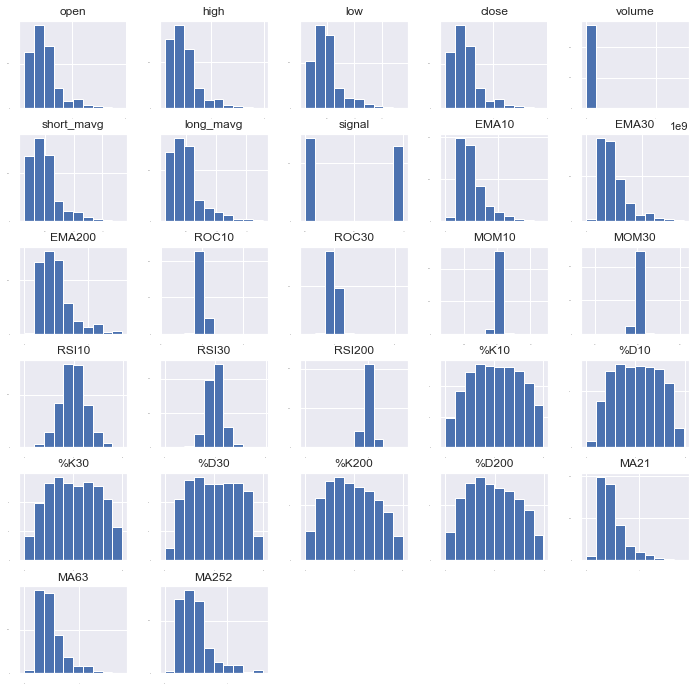

In [18]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

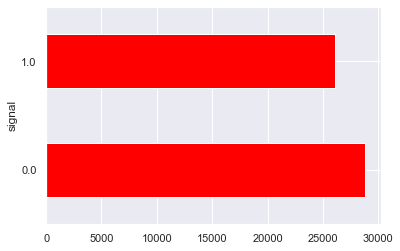

In [19]:
fig = plt.figure()
plot = df.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

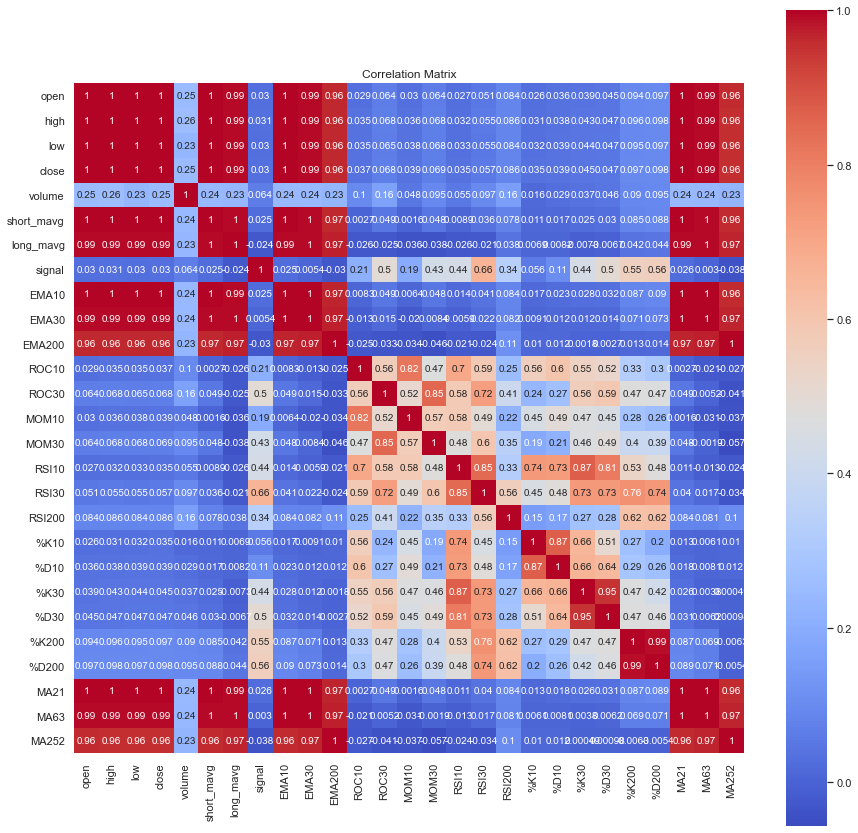

In [20]:
# correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='coolwarm')

In [21]:
df=df.drop(['high','low','open', 'volume','short_mavg','long_mavg'], axis=1)
df.head(5)

,close,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
date,,,,,,,,,,,,,,,,,,,,,
2018-05-04 15:00:00,0.92300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-04 16:00:00,0.90199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-04 17:00:00,0.90128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-04 18:00:00,0.91596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-04 19:00:00,0.90098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
subset_dataset= df.iloc[-100000:]
Y= subset_dataset["signal"]
X = subset_dataset.loc[:, df.columns != 'signal']
validation_size = int(len(X) * 0.2)
X_train = X.iloc[:-validation_size]
X_validation = X.iloc[-validation_size:]
Y_train = Y.iloc[:-validation_size]
Y_validation = Y.iloc[-validation_size:]

# Confirm the sizes of the splits
print(f"Training set: {X_train.shape}, Validation set: {X_validation.shape}")

Training set: (43930, 20), Validation set: (10982, 20)


In [50]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

#Neural Network
models.append(('NN', MLPClassifier()))

# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

In [51]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

results = []
names = []

# Set up TimeSeriesSplit
ts_split = TimeSeriesSplit(n_splits=5)

for name, model in models:
    # Perform cross-validation with TimeSeriesSplit
    cv_results = cross_val_score(model, X_train, Y_train, cv=ts_split, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.858298 (0.017548)
LDA: 0.889277 (0.023561)
KNN: 0.827373 (0.014237)
CART: 0.844775 (0.026135)
NB: 0.777326 (0.009028)
NN: 0.892419 (0.012211)
AB: 0.875536 (0.038900)
GBM: 0.885098 (0.031935)
RF: 0.891408 (0.013222)


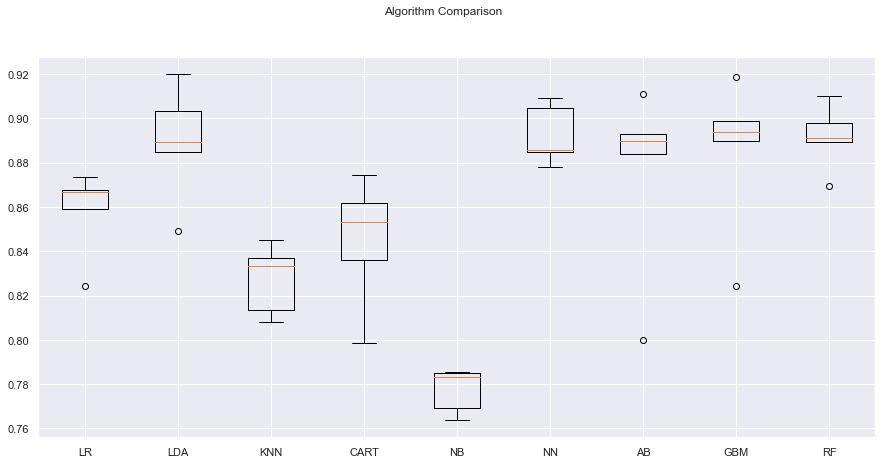

In [52]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,7)
plt.show()

In [1]:
import optuna

# Standardize the dataset
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

def objective(trial):
    # Define hyperparameter space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'max_features': trial.suggest_float('max_features', 0.5, 1.0),
    }

    # Initialize TimeSeriesSplit
    ts_split = TimeSeriesSplit(n_splits=5)
    accuracy_scores = []

    for train_idx, val_idx in ts_split.split(rescaledX):
        X_train_fold, X_val_fold = rescaledX[train_idx], rescaledX[val_idx]
        Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

        # Train the model
        model = GradientBoostingClassifier(**param)
        model.fit(X_train_fold, Y_train_fold)

        # Validate the model
        preds = model.predict(X_val_fold)
        accuracy = accuracy_score(Y_val_fold, preds)
        accuracy_scores.append(accuracy)

    return np.mean(accuracy_scores)

# Create the Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters and the best accuracy
print(f"Best Accuracy: {study.best_value}")
print(f"Best Parameters: {study.best_params_}")


NameError: name 'StandardScaler' is not defined

In [27]:
model = LogisticRegression(C=100, penalty='l2',solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(C=100, solver='liblinear')

In [28]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9150505326413548
[[5390  433]
 [ 500 4660]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      5823
         1.0       0.91      0.90      0.91      5160

    accuracy                           0.92     10983
   macro avg       0.92      0.91      0.91     10983
weighted avg       0.92      0.92      0.92     10983



array([1., 1., 1., ..., 1., 1., 1.])

<Axes: xlabel='Predicted', ylabel='Actual'>

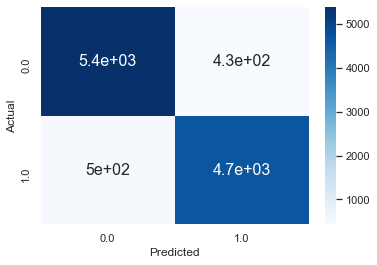

In [29]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

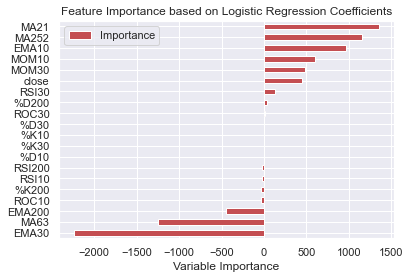

In [31]:
coefficients = model.coef_[0]  # Coefficients for the features

# Create a DataFrame to hold the importance values
Importance = pd.DataFrame({'Importance': coefficients * 100}, index=X.columns)

# Sort and plot the feature importance
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.show()

In [36]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])

AttributeError: 'numpy.ndarray' object has no attribute 'shift'

<Axes: >

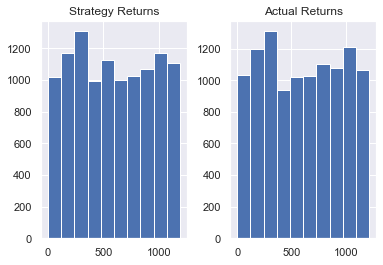

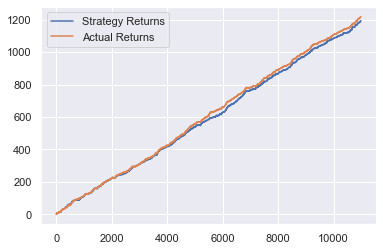

In [45]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_validation.index)

backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = Y_validation
backtestdata['close'] = X_validation['close']
backtestdata['Market Returns'] = X_validation['close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata['position'] = backtestdata['signal_pred'].apply(lambda x: 0 if x == 1 else 1)
backtestdata=backtestdata.reset_index()

backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()

In [46]:
backtestdata

,date,signal_pred,signal_actual,close,Market Returns,Actual Returns,Strategy Returns,position
0,2019-07-22 16:00:00,1.0,0.0,0.32292,NaN,NaN,NaN,0
1,2020-11-06 23:00:00,1.0,1.0,0.25845,-0.199647,-0.000000,-0.199647,0
2,2020-04-02 12:00:00,1.0,1.0,0.17556,-0.320720,-0.320720,-0.320720,0
3,2021-11-07 15:00:00,0.0,0.0,1.16710,5.647870,5.647870,5.647870,1
4,2023-06-09 01:00:00,0.0,1.0,0.52110,-0.553509,-0.000000,-0.000000,1
...,...,...,...,...,...,...,...,...
10978,2024-03-06 08:00:00,0.0,0.0,0.58590,0.266510,0.000000,0.000000,1
10979,2020-11-19 13:00:00,0.0,0.0,0.28982,-0.505342,-0.000000,-0.000000,1
10980,2024-04-07 03:00:00,1.0,1.0,0.59070,1.038162,0.000000,0.000000,0
10981,2018-12-19 05:00:00,1.0,1.0,0.33547,-0.432081,-0.432081,-0.432081,0


<Axes: >

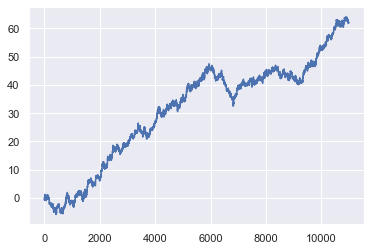

In [47]:
pnl = backtestdata['close'].diff() * backtestdata['position'].shift(1)
pnl.cumsum().plot()